In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import matplotlib.cm as cm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits, load_sample_image
from sklearn.manifold import TSNE, Isomap
from scipy.stats import mode
from sklearn.metrics import accuracy_score, homogeneity_score, completeness_score
%matplotlib inline

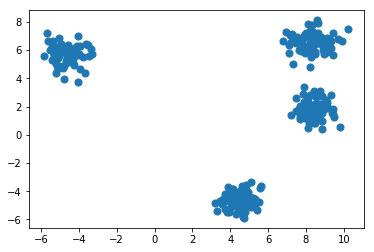

In [2]:
# Generate data
X, y = make_blobs(
    n_samples = 300,
    centers = 4,
    cluster_std = 0.60, 
    random_state = 314
)

plt.scatter(X[:, 0], X[:, 1], s = 50)

In [3]:
# Run k-means algorightm
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)

# Identify within-cluster counts
np.bincount(y_kmeans)

array([75, 75, 75, 75])

In [4]:
# Print cluster centers
kmeans.cluster_centers_

array([[ 8.39532016,  1.74506081],
       [-4.66875168,  5.64760107],
       [ 4.5011962 , -4.66229238],
       [ 8.31355064,  6.57749122]])

In [5]:
# Define function to print clusters with centroids
def plot_clusters(data,clusters,y):
    plt.scatter(data[:, 0], data[:, 1], c = y, s = 50, cmap = 'viridis')
    centers = clusters.cluster_centers_
    plt.scatter(centers[:,0], centers[:,1],
                c='black', s = 200, alpha = 0.5)

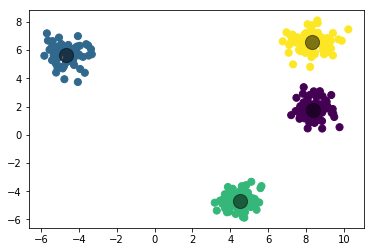

In [6]:
# Plot clusters of synthetic data
plot_clusters(X,kmeans, y_kmeans)

In [7]:
# Read and scale cancer data
cancer_data = load_breast_cancer()
scaler = StandardScaler().fit(cancer_data.data)
X_cancer = scaler.transform(cancer_data.data)

In [8]:
# Run k-means on cancer data
kmeans = KMeans(n_clusters = 2)
cancer_kmeans = kmeans.fit_predict(X_cancer)
kmeans.cluster_centers_


array([[ 0.97397614,  0.48151381,  1.0066346 ,  0.96352718,  0.60925407,
         1.020696  ,  1.13942935,  1.16458212,  0.61113855,  0.25222982,
         0.85859633,  0.04274078,  0.86027888,  0.8071077 ,  0.01706063,
         0.69505052,  0.63689512,  0.77623856,  0.14038222,  0.41503212,
         1.04008365,  0.50631048,  1.06597067,  1.00315418,  0.60829274,
         0.95083725,  1.04429844,  1.14621103,  0.59741617,  0.62246932],
       [-0.48442497, -0.23948977, -0.50066826, -0.47922799, -0.30302374,
        -0.50766196, -0.56671617, -0.57922637, -0.30396101, -0.12545115,
        -0.4270387 , -0.02125791, -0.42787555, -0.40142988, -0.00848542,
        -0.34569618, -0.31677152, -0.38607654, -0.06982168, -0.20642387,
        -0.51730476, -0.25182285, -0.53018015, -0.49893721, -0.3025456 ,
        -0.47291642, -0.51940106, -0.57008917, -0.29713594, -0.30959659]])

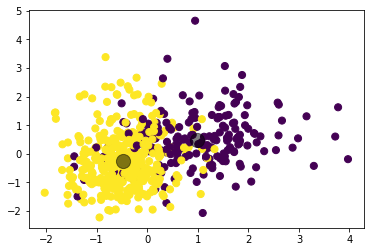

In [9]:
# Plot cancer clusters
plot_clusters(X_cancer,kmeans,cancer_kmeans)

In [10]:
# Generate artificial labels
labels = np.zeros_like(cancer_kmeans)

In [11]:
def get_cluster_accuracy(target, clusters, numClasses):
    labels = np.zeros_like(clusters)
    for i in range(numClasses):
        mask = (clusters == i)
        labels[mask] = mode(target[mask])[0]
    
    return accuracy_score(target, labels), homogeneity_score(target, labels), completeness_score(target, labels)

In [12]:
# Measure clustering performance
get_cluster_accuracy(cancer_data.target, cancer_kmeans, 2)

(0.9103690685413005, 0.5442739102091959, 0.5653508768266774)

In [13]:
# Load digit data
digits = load_digits()
digits.data.shape
digits_data = digits.data / 255

In [14]:
# Run k-means on digit data
kmeans = KMeans(n_clusters = 10, random_state = 0)
digits_kmeans = kmeans.fit_predict(digits_data)
kmeans.cluster_centers_.shape

(10, 64)

In [15]:
# Measure clustering performance
get_cluster_accuracy(digits.target,digits_kmeans,10)

(0.7935447968836951, 0.7423769268336259, 0.7514312243853245)

In [16]:
# Reduce dimensions, then run k means
tsne = TSNE(n_components = 2, init = 'random', random_state = 314)
digits_projected = tsne.fit_transform(digits_data)


kmeans = KMeans(n_clusters = 10, random_state = 0)
digits_kmeans = kmeans.fit_predict(digits_projected)

get_cluster_accuracy(digits.target, digits_kmeans, 10)

(0.9443516972732332, 0.909248287296302, 0.910503679519114)

In [17]:
# Revisit Cancer data
tsne = TSNE(n_components = 2, init = 'random', random_state = 0)
cancer_projected = tsne.fit_transform(X_cancer)

kmeans = KMeans(n_clusters = 2)
cancer_kmeans = kmeans.fit_predict(cancer_projected)

get_cluster_accuracy(cancer_data.target, cancer_kmeans, 2)

(0.9261862917398945, 0.6399136796052645, 0.6216372247769649)

In [18]:
# Repeat process with Isomap instead of TSNE
iso = Isomap(n_neighbors = 5, n_components = 2)
cancer_iso_projected = iso.fit_transform(X_cancer)
cancer_kmeans = kmeans.fit_predict(cancer_iso_projected)
get_cluster_accuracy(cancer_data.target, cancer_kmeans, 2)

(0.9332161687170475, 0.6343604044495395, 0.6602079836771583)